# Compare and Difference Model Run with Upscaled ASO Data

In [1]:
#imports
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import xarray as xr
import rasterio
import rioxarray 
import hvplot.xarray 
from rasterio.warp import reproject, Resampling
from matplotlib_scalebar.scalebar import ScaleBar

In [2]:
# set temperature threshold. choices: [0,1,2]
threshold = 0
# set day. choices: ['20160329','20160208']
day_str = '20160329'
# set stat. choices: [0,1,2,3,4] represent ensemble [mean,std,median,25%,75%]
stat = 2

In [3]:
# set DOWY
if day_str == '20160329':
    day_num = 180
elif day_str == '20160208':
    day_num = 130
else:
    print('Invalid date')

In [4]:
print(f'Temperature Threshold = {threshold}K, Day = {day_str}, DOWY = {day_num}.')

Temperature Threshold = 0K, Day = 20160329, DOWY = 180.


In [5]:
#open model run netcdf
xds = xr.open_dataset(f"../SnowHydro/data/Model_Output/{threshold}K_Threshold/N47_0W124_0_agg_16_SWE_SCA_POST_WY2015_16.nc")
#xds

In [6]:
# select the day and stat we want from the model run, set spatial dimensions, and set crs
model_ds = xds['SWE_Post'].sel(Day=day_num,Stats=stat).T
model_ds.rio.set_spatial_dims('Longitude','Latitude',inplace=True)
model_ds.rio.set_crs('EPSG:4326',inplace=True);

In [7]:
# open ASO dataset, check crs
ASO_500m_ds = xr.open_rasterio(f'data/Olympics_ASO_SWE_2016/ASO_500m_SWE_USAWOL_{day_str}.tif')

Text(0.5, 0.98, 'Pre Reproject Match Comparison')

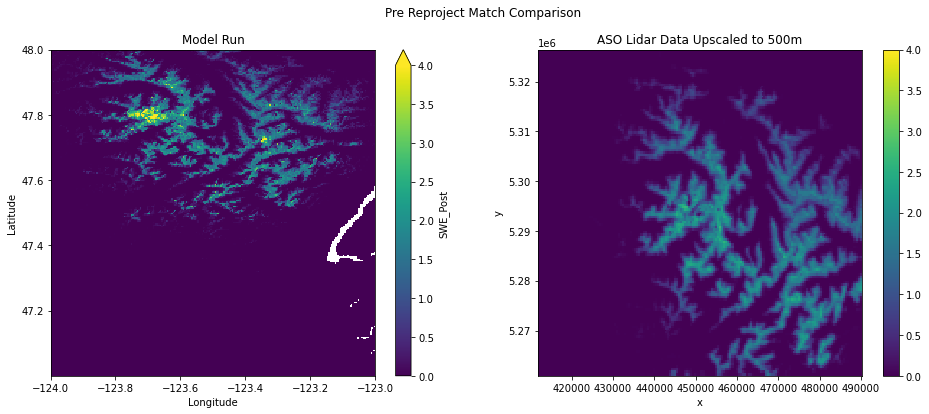

In [8]:
# comparing before reproject
f,ax = plt.subplots(1,2,figsize=(16,6))
model_ds.plot(ax=ax[0],vmin=0,vmax=4)
ax[0].set_title('Model Run')
ASO_500m_ds.plot(ax=ax[1],vmin=0,vmax=4)
ax[1].set_title('ASO Lidar Data Upscaled to 500m')
f.suptitle('Pre Reproject Match Comparison')

In [9]:
# reprojecting
model_reproject = model_ds.rio.reproject_match(ASO_500m_ds)

/srv/conda/envs/notebook/lib/python3.8/site-packages/pyproj/crs/crs.py:280: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  projstring = _prepare_from_string(projparams)


Text(0.5, 0.98, 'Post Reproject Match Comparison')

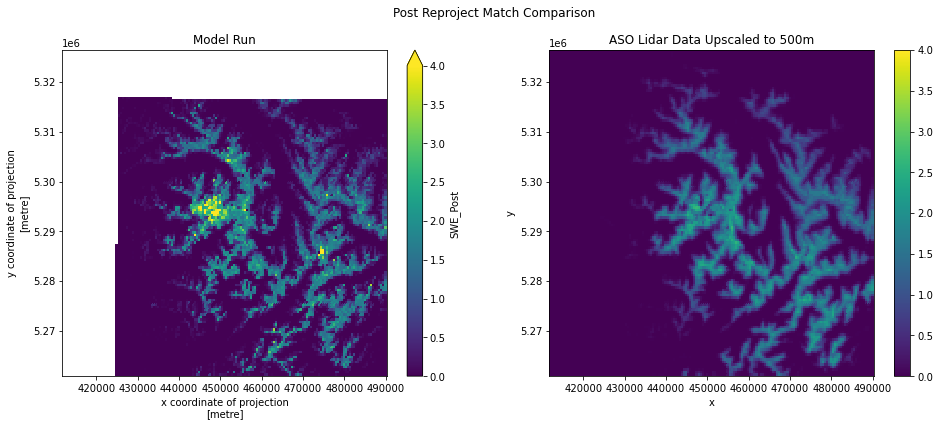

In [10]:
# post projection comparison
f, ax = plt.subplots(1,2,figsize=(16,6))
model_reproject.plot(ax=ax[0],vmin=0,vmax=4)
ax[0].set_title('Model Run')
ASO_500m_ds.plot(ax=ax[1],vmin=0,vmax=4)
ax[1].set_title('ASO Lidar Data Upscaled to 500m')
f.suptitle('Post Reproject Match Comparison')

In [11]:
# difference
difference = model_reproject - ASO_500m_ds

Text(0.5, 1.0, 'ASO - Model')

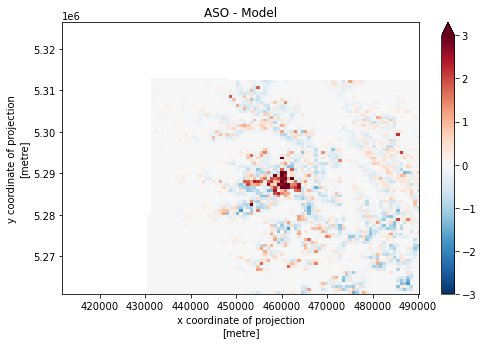

In [12]:
# show difference
f, ax = plt.subplots(figsize=(8,5))
difference.squeeze().plot.imshow(ax=ax,vmin=-3,vmax=3,cmap='RdBu_r')
ax.set_title('ASO - Model')

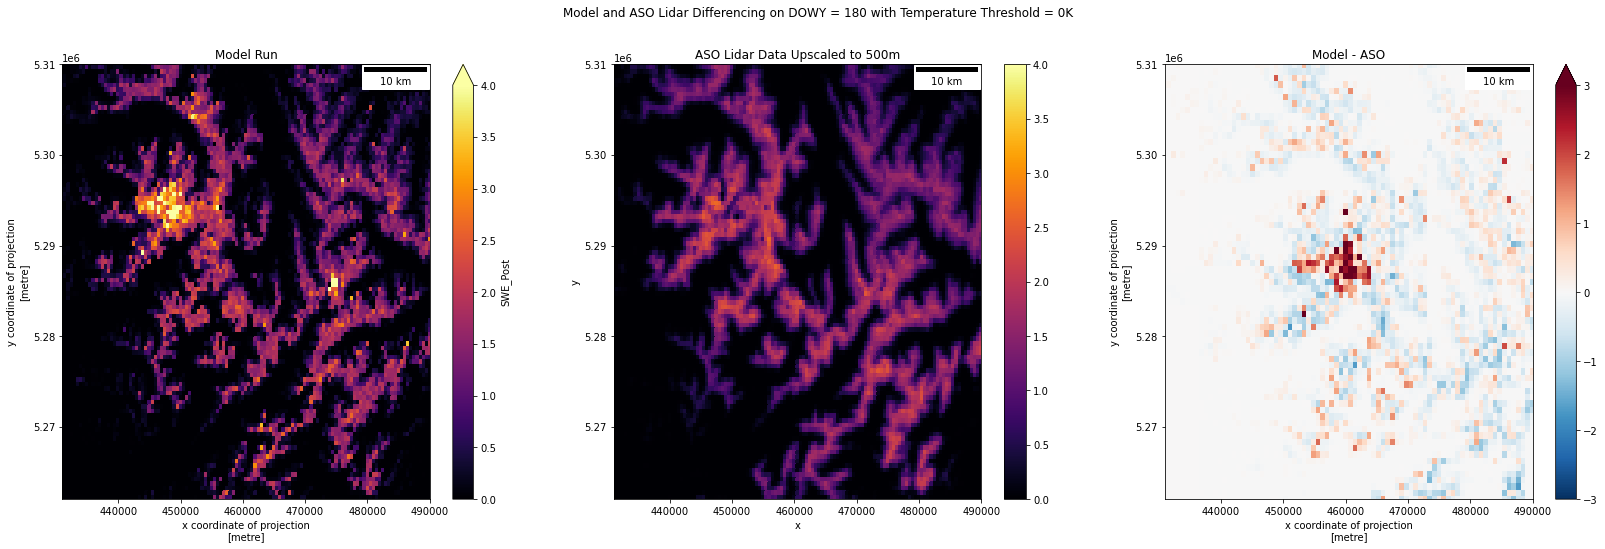

In [16]:
# plot differencing
f, ax = plt.subplots(1,3,figsize=(28,8)) 
model_reproject.plot(ax=ax[0],vmin=0,vmax=4,cmap='inferno')
ax[0].set_title('Model Run')
ASO_500m_ds.plot(ax=ax[1],vmin=0,vmax=4,cmap='inferno')
ax[1].set_title('ASO Lidar Data Upscaled to 500m')
difference.squeeze().plot.imshow(ax=ax[2],vmin=-3,vmax=3,cmap='RdBu_r')
ax[2].set_title('Model - ASO')
f.suptitle(f'Model and ASO Lidar Differencing on DOWY = {day_num} with Temperature Threshold = {threshold}K')
for i in range(len(ax)):
    ax[i].set_xlim([431000, 490000])
    ax[i].set_ylim([5.262e6, 5.31e6])
    ax[i].add_artist(ScaleBar(1.0))
